# Read and Save the file(usedcars.csv)

In [6]:
import pandas as pd
from pathlib import Path 

DataFolderPath = Path("Analysis/Data")
DataFolderPath.mkdir(parents=True, exist_ok=True)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(url)
df.to_csv(f"{DataFolderPath}/usedcars.csv")
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


<h2>1. Linear Regression and Multiple Linear Regression</h2>


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg

LinearRegression()

## use "highway-mpg" to predict "price"

In [29]:
import numpy as np 
from sklearn.metrics import mean_squared_error
X = df[["highway-mpg"]]
Y = df["price"]
reg.fit(X, Y)

yPred = reg.predict(X)

MSE = mean_squared_error(Y, yPred)
#MSE = np.mean(np.square(Y- yPred)) 

print(f"MSE of Training with hm and hp : {MSE}")

MSE of Training with hm and hp : 31635042.944639888


In [30]:
reg.intercept_

38423.3058581574

In [31]:
reg.coef_

array([-821.73337832])

<h2>2. Model Evaluation Using Visualization</h2>


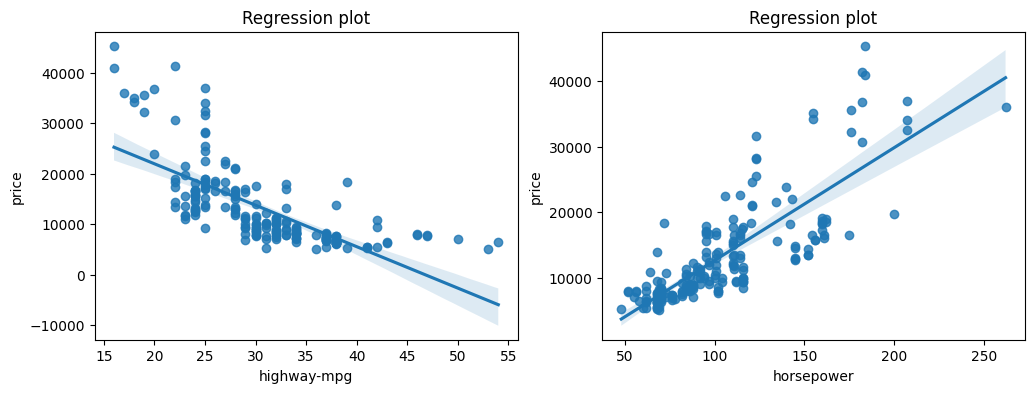

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.regplot(x="highway-mpg", y="price", data=df, ax=axes[0])
axes[0].set_title("Regression plot")
sns.regplot(x="horsepower", y="price", data=df, ax=axes[1])
axes[1].set_title("Regression plot")
plt.show()

(0.0, 47414.1)

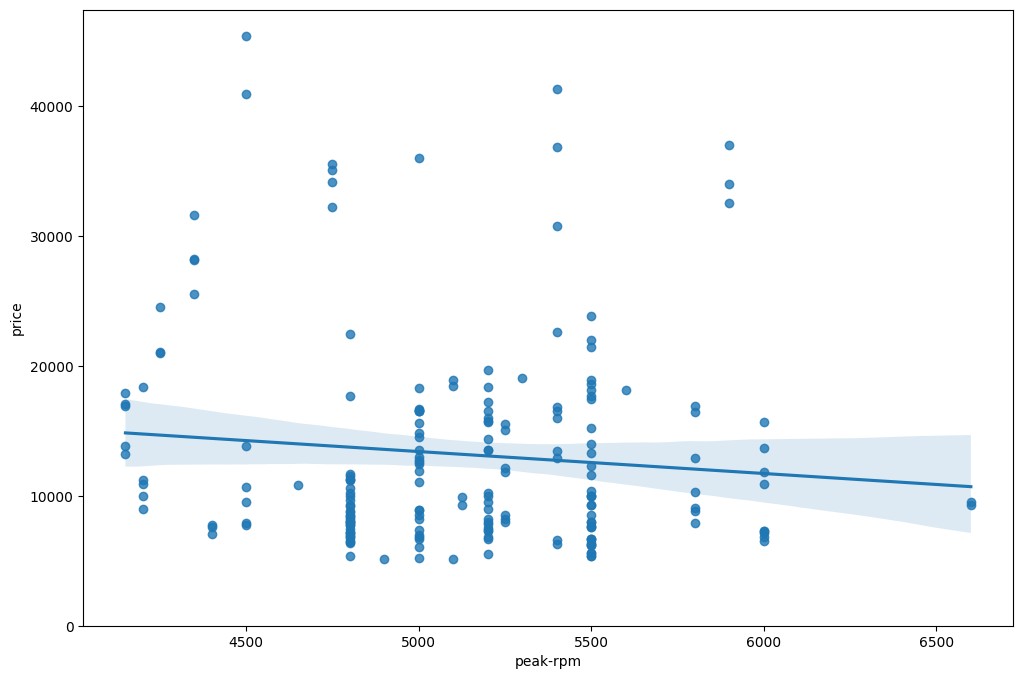

In [40]:
plt.figure(figsize=(12, 8))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [42]:
df[["peak-rpm", "highway-mpg", "price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


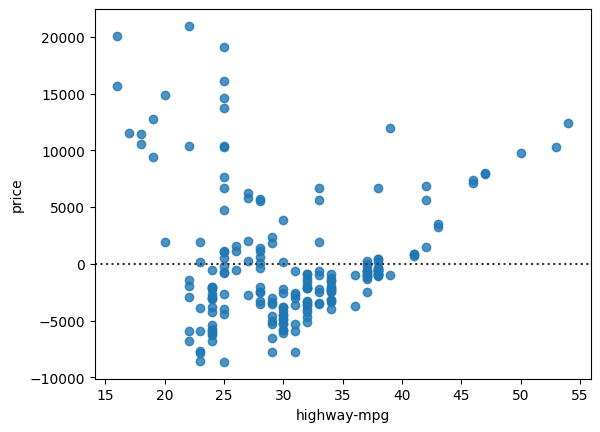

In [43]:
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<h3>Multiple Linear Regression</h3>


C:\Users\實驗室電腦\AppData\Local\Temp\ipykernel_15064\2924335792.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\實驗室電腦\AppData\Local\Temp\ipykernel_15064\2924335792.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

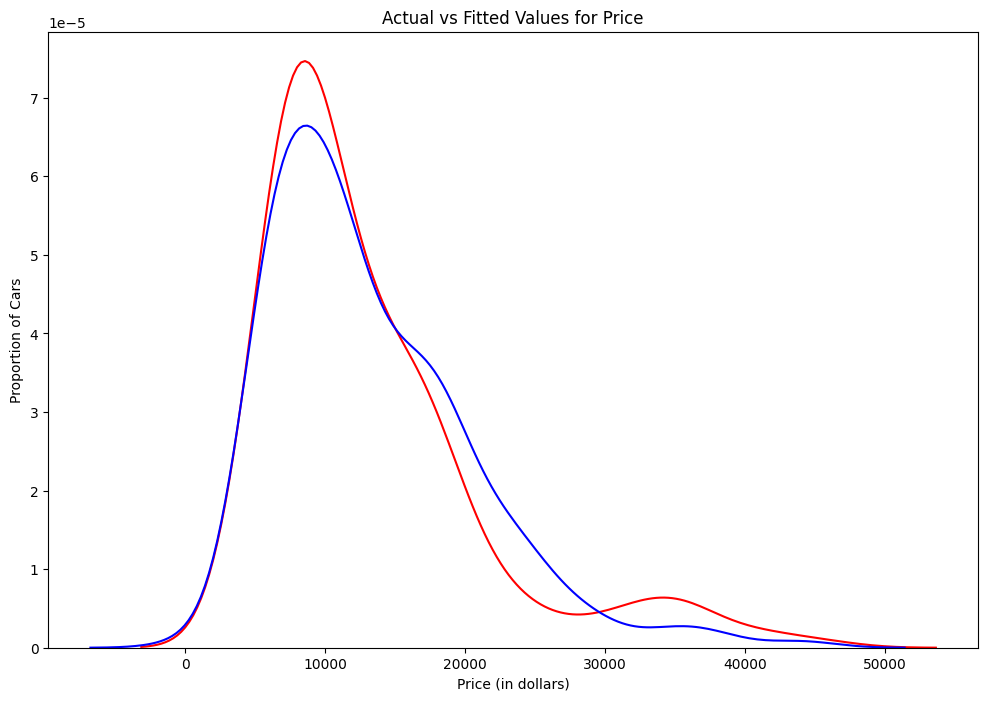

In [46]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df["price"]

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Z, Y)
yPred = lr.predict(Z)

plt.figure(figsize=(12, 8))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yPred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
